Stock Market Prediction Techniques: A Review Paper https://www.researchgate.net/publication/372296944_Techniques_for_Stock_Market_Prediction_A_Review

Enhancing Stock Market Prediction Through LSTM Modeling and Analysis https://eudl.eu/pdf/10.4108/eai.2-6-2023.2334692

Stock Price Prediction with Long-short Term Memory Model https://ieeexplore.ieee.org/document/9731005

Impact of Data Normalization on Stock Index Forecasting https://www.mirlabs.org/ijcisim/regular_papers_2014/IJCISIM_24.pdf

Exploiting noisy data normalization for stock market prediction https://www.researchgate.net/publication/316635771_Exploiting_noisy_data_normalization_for_stock_market_prediction

Abstract -> Introduction 

-> method and technique for reduced noise and enhance prediction
 
compare 

LSTM model

result

conclusion 

refference 

EMA
SMA
Exponentially smoothed 
kalman filter Estimate

In [1]:
import yfinance as yf
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = yf.download('aapl', start='2022-01-01',
                      end=datetime.now().strftime('%Y-%m-%d'),
                      progress=False,
                      period="ytd")
dataset = dataset.reset_index()
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.index = range(len(dataset))
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481110,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203201,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489624,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610184,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777832,86709100


In [2]:

sma_10 = dataset['Adj Close'].rolling(window=20).mean()
ema_10 = dataset['Adj Close'].ewm(span=20, adjust=False).mean()
# Kalman Filter (assumes constant level with Gaussian noise)
Q = 0.01
R = 1  # Measurement noise covariance (adjust for noise level)
P = 1  # Initial state covariance
xhat = np.zeros_like(dataset['Close'])  # Kalman filter state estimate (level)
xhat[0] = dataset['Close'][0]
for i in range(1, len(dataset['Close'])):
    # Predict
    xhat_pred = xhat[i-1]
    Phat_pred = P + Q

    # Update
    K = Phat_pred / (Phat_pred + R)
    xhat[i] = xhat_pred + K * (dataset['Close'][i] - xhat_pred)
    P = (1 - K) * Phat_pred

data = dataset.filter(['Close'])
#training_data_len = int(np.ceil(len(data.values) * .95))
training_data_len = int(np.ceil(len(data.values)) * .85)
training_data_len

538

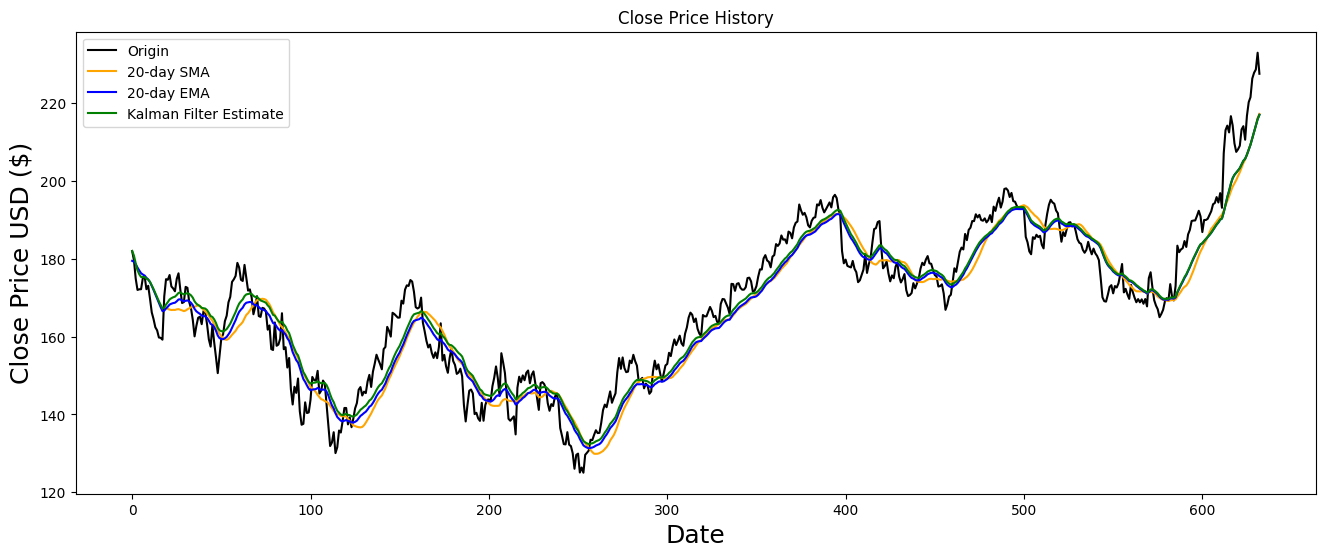

In [3]:

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(dataset['Close'], label='Origin', color='black')
plt.plot(sma_10, label='20-day SMA', color='orange')
plt.plot(ema_10, label='20-day EMA', color='blue')
plt.plot(xhat, label='Kalman Filter Estimate', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

Scaling to a range
1.Min-Max Normalization (done)
2.Max Abs Scaling
3.Hyperbolic Tangent(Tanh)

Scaling to a Distributin
1.Z-Score Normalization(Standardization)(done)
2.Robust Scaler (done)
3.Quantile Transformation (done)

Scaling to a Shape
1.Logarithmic transformation
2.Square Root Transformation
3.Square Transformation
4.Exponential Transformation

Parametric Scaling
1.Power Transformation(Box-Cox)
2.Yeo-Johnson Transformations

VertorNorm
1.L1
2.L2

Miscellaneous
1.Decimal Scaling
2.Winsorization



https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1

https://www.geeksforgeeks.org/data-normalization-in-data-mining/

16 Data Normalization Methods Using Python (With Examples) — Part 1 of 6
https://medium.com/@reinapeh/16-data-feature-normalization-methods-using-python-with-examples-part-1-of-3-26578b2b8ba6

In [26]:
#scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, Normalizer, MaxAbsScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

print("Scaler Min-Max", scaler)
print("Min-Max", scaled_data)

Scaler Min-Max MinMaxScaler()
Min-Max [[5.27880681e-01]
 [5.06483890e-01]
 [4.62208243e-01]
 [4.35161206e-01]
 [4.36735846e-01]
 [4.36921139e-01]
 [4.63690308e-01]
 [4.67858490e-01]
 [4.36921139e-01]
 [4.45072352e-01]
 [4.14783316e-01]
 [3.81715445e-01]
 [3.65783607e-01]
 [3.46332043e-01]
 [3.39014439e-01]
 [3.21971123e-01]
 [3.21137515e-01]
 [3.16784039e-01]
 [4.19692530e-01]
 [4.60911472e-01]
 [4.59336832e-01]
 [4.70729901e-01]
 [4.43497570e-01]
 [4.38773649e-01]
 [4.32011925e-01]
 [4.61374635e-01]
 [4.74805507e-01]
 [4.36272683e-01]
 [4.04038562e-01]
 [4.06261658e-01]
 [4.42478668e-01]
 [4.40255713e-01]
 [4.06261658e-01]
 [3.91626591e-01]
 [3.64023815e-01]
 [3.24657382e-01]
 [3.49388747e-01]
 [3.68933029e-01]
 [3.71433853e-01]
 [3.53649506e-01]
 [3.84772150e-01]
 [3.81715445e-01]
 [3.53371636e-01]
 [3.17525071e-01]
 [3.00296462e-01]
 [3.51333833e-01]
 [3.10300184e-01]
 [2.75194510e-01]
 [2.37124849e-01]
 [2.78529084e-01]
 [3.20211189e-01]
 [3.29751749e-01]
 [3.60874393e-01]
 [3.7384

In [5]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print(i)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.52788068, 0.50648389, 0.46220824, 0.43516121, 0.43673585,
       0.43692114, 0.46369031, 0.46785849, 0.43692114, 0.44507235,
       0.41478332, 0.38171544, 0.36578361, 0.34633204, 0.33901444,
       0.32197112, 0.32113751, 0.31678404, 0.41969253, 0.46091147,
       0.45933683, 0.4707299 , 0.44349757, 0.43877365, 0.43201192,
       0.46137464, 0.47480551, 0.43627268, 0.40403856, 0.40626166,
       0.44247867, 0.44025571, 0.40626166, 0.39162659, 0.36402381,
       0.32465738, 0.34938875, 0.36893303, 0.37143385, 0.35364951,
       0.38477215, 0.38171544, 0.35337164, 0.31752507, 0.30029646,
       0.35133383, 0.31030018, 0.27519451, 0.23712485, 0.27852908,
       0.32021119, 0.32975175, 0.36087439, 0.37384224, 0.40570592,
       0.41858105, 0.45433504, 0.46035573, 0.46850695, 0.49962959])]
[0.4886069662534971]
60

[array([0.52788068, 0.50648389, 0.46220824, 0.43516121, 0.43673585,
       0.43692114, 0.46369031, 0.46785849, 0.43692114, 0.44507235,
       0.41478332, 0.38171544, 0.

Lstm model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=1)
#RMSE: 5.989546160938989
#Median Absolute Error (MAE): 3.715057373046875

#model.fit(x_train, y_train, epochs=5, batch_size=50)
#RMSE: 9.293033360524161
#Median Absolute Error (MAE): 4.8186492919921875



Epoch 1/2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0149
Epoch 2/2
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0043


In [7]:
from sklearn.metrics import median_absolute_error

test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = data.values[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
medae = median_absolute_error(y_test, predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse}')
print(f'Median Absolute Error (MAE): {medae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
RMSE: 5.368365040572885
Median Absolute Error (MAE): 3.0681304931640625


/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_39913/537430229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


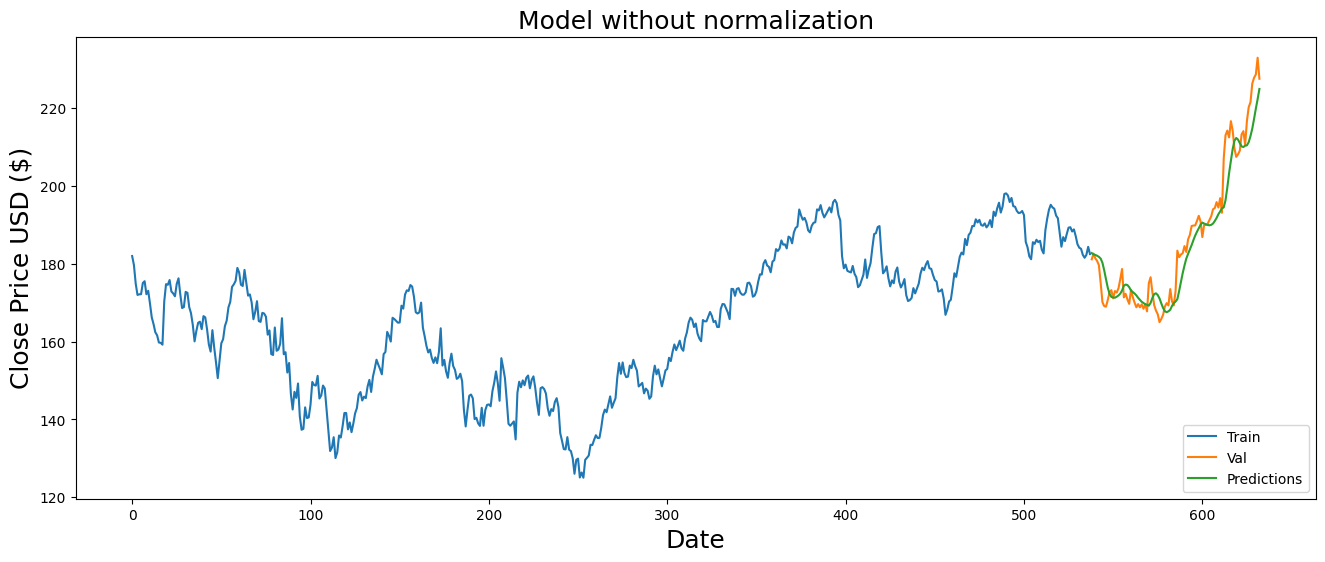

In [8]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model without normalization', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Experiment Zone 

In [9]:
x_train = []
y_train = []
    

def visualizeTrain(scaleable_type, xtrain, ytrain, model):
    # Create the training data set
    # Create the scaled training data set
    trained_data = scaleable_type[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    for i in range(60, len(trained_data)):
        xtrain.append(trained_data[i-60:i, 0])
        ytrain.append(trained_data[i, 0])
        if i <= 61:
            print(xtrain)
            print(ytrain)
            print(i)
            print()

    # Convert the x_train and y_train to numpy arrays
    xtrain, ytrain = np.array(xtrain), np.array(ytrain)

    # Reshape the data
    xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
    #model = Sequential()
    model.add(LSTM(128, return_sequences=True,
              input_shape=(xtrain.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(xtrain, ytrain, epochs=2, batch_size=1)
    
x_test = []

def Evaluation(scaleable_type, scaler, xtest):
    test_data = scaleable_type[training_data_len - 60:, :]
    # Create the data sets x_test and y_test
    ytest = data.values[training_data_len:, :]
    for i in range(60, len(test_data)):
        xtest.append(test_data[i-60:i, 0])

    # Convert the data to a numpy array
    xtest = np.array(xtest)

    # Reshape the data
    xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

    # Get the models predicted price values
    predicted = model.predict(xtest)
    predicted = scaler.inverse_transform(predicted)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predicted - ytest) ** 2)))
    medae = median_absolute_error(ytest, predicted)

    # Print the evaluation metrics
    print(f'RMSE: {rmse}')
    print(f'Median Absolute Error (MAE): {medae}')
    
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predicted
    # Visualize the data
    plt.figure(figsize=(16, 6))
    plt.title('Model without normalization', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    

Scaling to a range

[array([ 0.68846685,  0.57098951,  0.32789768,  0.17939812,  0.18804355,
        0.18906089,  0.33603483,  0.35891989,  0.18906089,  0.23381446,
        0.06751497, -0.11404149, -0.20151395, -0.30831118, -0.34848789,
       -0.44206283, -0.44663968, -0.47054209,  0.09446861,  0.32077786,
        0.31213243,  0.37468514,  0.22516825,  0.19923194,  0.16210725,
        0.32332082,  0.39706193,  0.18550059,  0.00852177,  0.0207275 ,
        0.21957405,  0.2073691 ,  0.0207275 , -0.05962514, -0.21117594,
       -0.42731414, -0.29152859, -0.1842223 , -0.17049173, -0.26813524,
       -0.0972589 , -0.11404149, -0.26966086, -0.46647351, -0.56106579,
       -0.28084925, -0.50614116, -0.69888601, -0.90790439, -0.68057781,
       -0.4517256 , -0.39934393, -0.22846759, -0.15726866,  0.01767626,
        0.08836613,  0.2846705 ,  0.31772662,  0.36248019,  0.53335654])]
[0.4728377164223755]
60

[array([ 0.68846685,  0.57098951,  0.32789768,  0.17939812,  0.18804355,
        0.18906089,  0.33603483,  0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.1785
Epoch 2/2
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0720
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE: 5.96856167106046
Median Absolute Error (MAE): 2.9911956787109375


/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_39913/131405500.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted


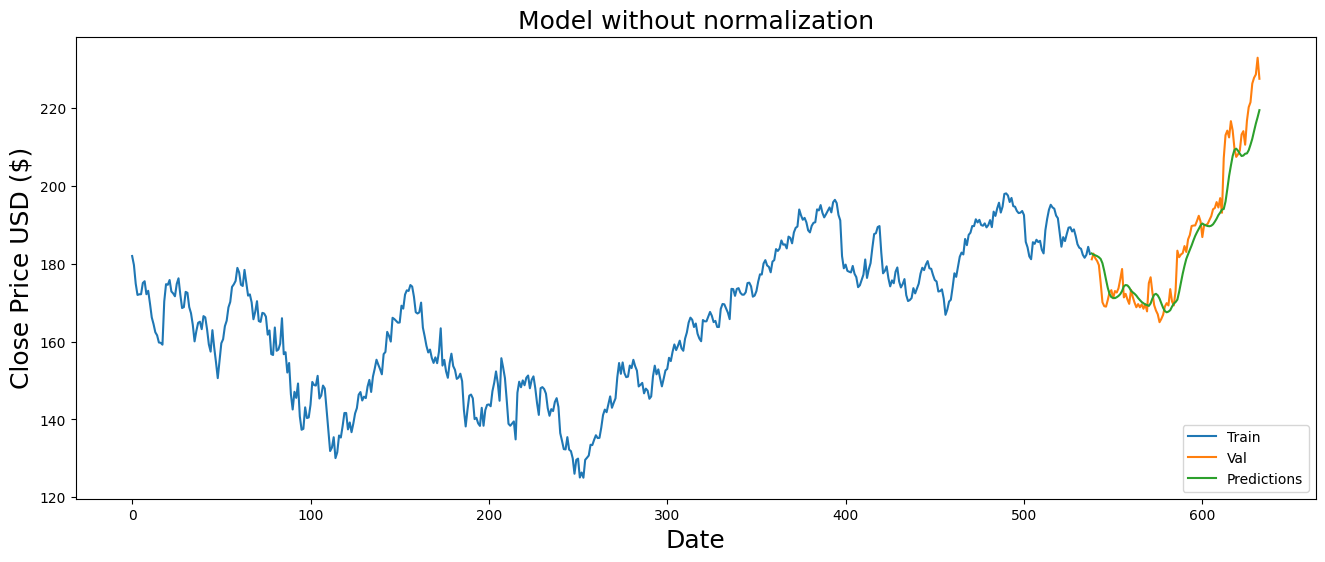

In [10]:
# Z-Score Normalization
scalerZScore = StandardScaler()
scaled_Z_Score = scalerZScore.fit_transform(data.values)

x_train_Z = []
y_train_Z = []
x_test_Z = []
modelZ = Sequential()

visualizeTrain(scaled_Z_Score, x_train_Z, y_train_Z, modelZ)
Evaluation(scaled_Z_Score, scalerZScore, xtest=x_test_Z)

In [27]:
# Max Abs Scaling
scalerMaxAbs = MaxAbsScaler()
scaled_MaxAbs = scalerMaxAbs.fit_transform(data.values)
print(scaled_MaxAbs)

[[0.78122585]
 [0.77131084]
 [0.75079407]
 [0.73826081]
 [0.73899048]
 [0.73907634]
 [0.75148084]
 [0.75341232]
 [0.73907634]
 [0.74285351]
 [0.72881795]
 [0.71349472]
 [0.7061121 ]
 [0.69709849]
 [0.69370761]
 [0.68580995]
 [0.68542366]
 [0.68340632]
 [0.73109282]
 [0.75019316]
 [0.74946349]
 [0.75474289]
 [0.74212377]
 [0.73993477]
 [0.73680147]
 [0.75040778]
 [0.75663148]
 [0.73877585]
 [0.72383897]
 [0.72486912]
 [0.74165163]
 [0.74062154]
 [0.72486912]
 [0.71808742]
 [0.70529664]
 [0.68705473]
 [0.69851493]
 [0.7075715 ]
 [0.70873036]
 [0.70048931]
 [0.71491115]
 [0.71349472]
 [0.70036055]
 [0.6837497 ]
 [0.67576618]
 [0.69941626]
 [0.68040178]
 [0.66413425]
 [0.64649325]
 [0.66567945]
 [0.68499442]
 [0.68941539]
 [0.70383723]
 [0.70984637]
 [0.7246116 ]
 [0.73057777]
 [0.74714572]
 [0.74993564]
 [0.75371281]
 [0.76813465]
 [0.7630269 ]
 [0.74946349]
 [0.74817581]
 [0.76590268]
 [0.75139497]
 [0.73753114]
 [0.73886172]
 [0.73006266]
 [0.71143447]
 [0.71963262]
 [0.73139324]
 [0.70

In [ ]:
# Max Abs Scaling
scalerMaxAbs = MaxAbsScaler()
scaled_MaxAbs = scalerMaxAbs.fit_transform(data.values)
print(scaled_MaxAbs)

[array([ 0.66456445,  0.57327916,  0.32699603,  0.09931764,  0.12326313,
        0.12926003,  0.34798946,  0.37338656,  0.12926003,  0.20367485,
       -0.01189883, -0.18548569, -0.28956127, -0.35220631, -0.3691374 ,
       -0.41194499, -0.41626624, -0.43799156,  0.02181574,  0.31030489,
        0.29991695,  0.39045174,  0.17943655,  0.1392653 ,  0.07940705,
        0.31863936,  0.40763141,  0.11527412, -0.08736707, -0.06946404,
        0.17138118,  0.14727953, -0.06946404, -0.14327126, -0.29369975,
       -0.4033254 , -0.34377878, -0.28129908, -0.25252808, -0.32699603,
       -0.17138118, -0.18548569, -0.33118291, -0.42927718, -0.48208321,
       -0.3353756 , -0.45112601, -0.57327916, -0.78314102, -0.56395492,
       -0.42059529, -0.39045174, -0.29784327, -0.22803343, -0.08139656,
        0.01189883,  0.26894152,  0.30614576,  0.37764248,  0.53169579])]
[0.468760962448766]
60

[array([ 0.66456445,  0.57327916,  0.32699603,  0.09931764,  0.12326313,
        0.12926003,  0.34798946,  0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (633). n_quantiles is set to n_samples.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.2553
Epoch 2/2
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1580
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
RMSE: 6.377483535689574
Median Absolute Error (MAE): 2.77447509765625


/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_39913/131405500.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted


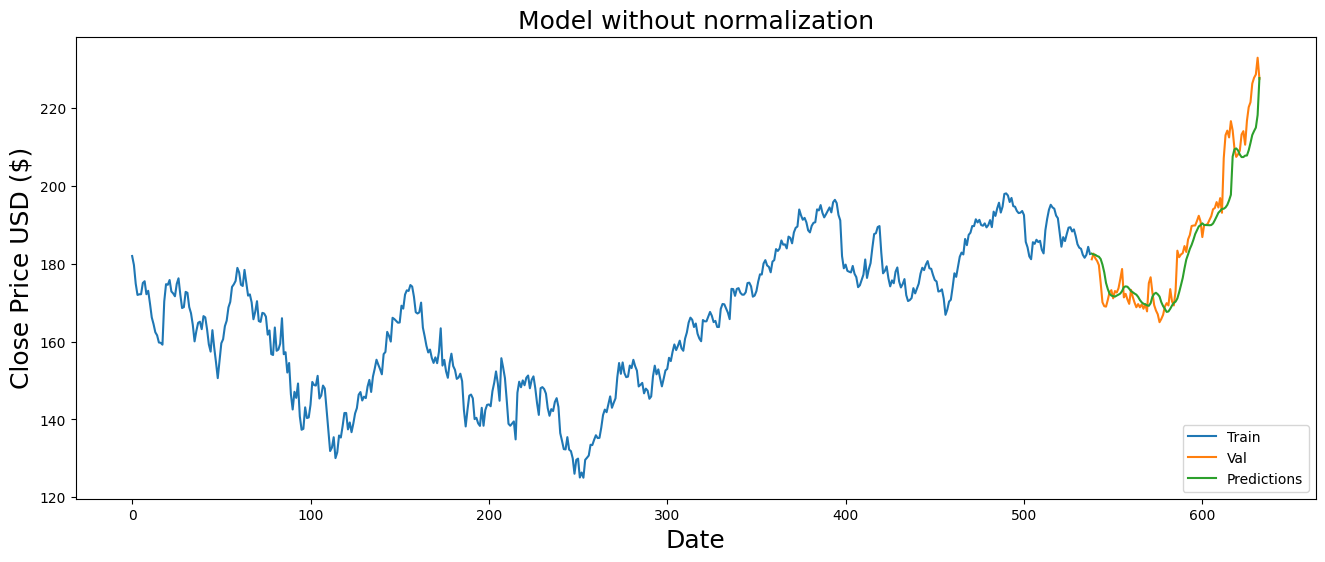

In [11]:
# quantile transformation
scalerQuantile = QuantileTransformer(output_distribution='normal')
scaled_quantile = scalerQuantile.fit_transform(data.values)

x_train_Quantile = []
y_train_Quantile = []
x_test_Quantile = []
modelQuantile = Sequential()

visualizeTrain(scaled_quantile, x_train_Quantile,
               y_train_Quantile, modelQuantile)
Evaluation(scaled_quantile, scalerQuantile, xtest=x_test_Quantile)

[array([ 0.40241834,  0.32482354,  0.16425928,  0.06617403,  0.07188442,
        0.07255638,  0.16963394,  0.18474972,  0.07255638,  0.1021165 ,
       -0.00772575, -0.12764536, -0.18542168, -0.25596218, -0.28249924,
       -0.3443063 , -0.34732935, -0.3631171 ,  0.01007736,  0.15955658,
        0.15384619,  0.19516281,  0.0964056 ,  0.07927445,  0.05475326,
        0.16123622,  0.20994287,  0.07020477, -0.04669127, -0.03862928,
        0.09271058,  0.08464911, -0.03862928, -0.0917029 , -0.19180351,
       -0.33456466, -0.24487713, -0.1740004 , -0.16493124, -0.22942562,
       -0.11656032, -0.12764536, -0.23043331, -0.36042977, -0.42290879,
       -0.23782334, -0.3866306 , -0.51394024, -0.65199869, -0.50184751,
       -0.35068864, -0.3160901 , -0.2032248 , -0.15619729, -0.04064465,
        0.00604662,  0.13570736,  0.15754121,  0.18710133,  0.29996663])]
[0.2599934290343397]
60

[array([ 0.40241834,  0.32482354,  0.16425928,  0.06617403,  0.07188442,
        0.07255638,  0.16963394,  0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0875
Epoch 2/2
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0307
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE: 5.451869268794089
Median Absolute Error (MAE): 3.2214813232421875


/var/folders/jb/ggq229g94ql147w8sftb9qs80000gn/T/ipykernel_39913/131405500.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted


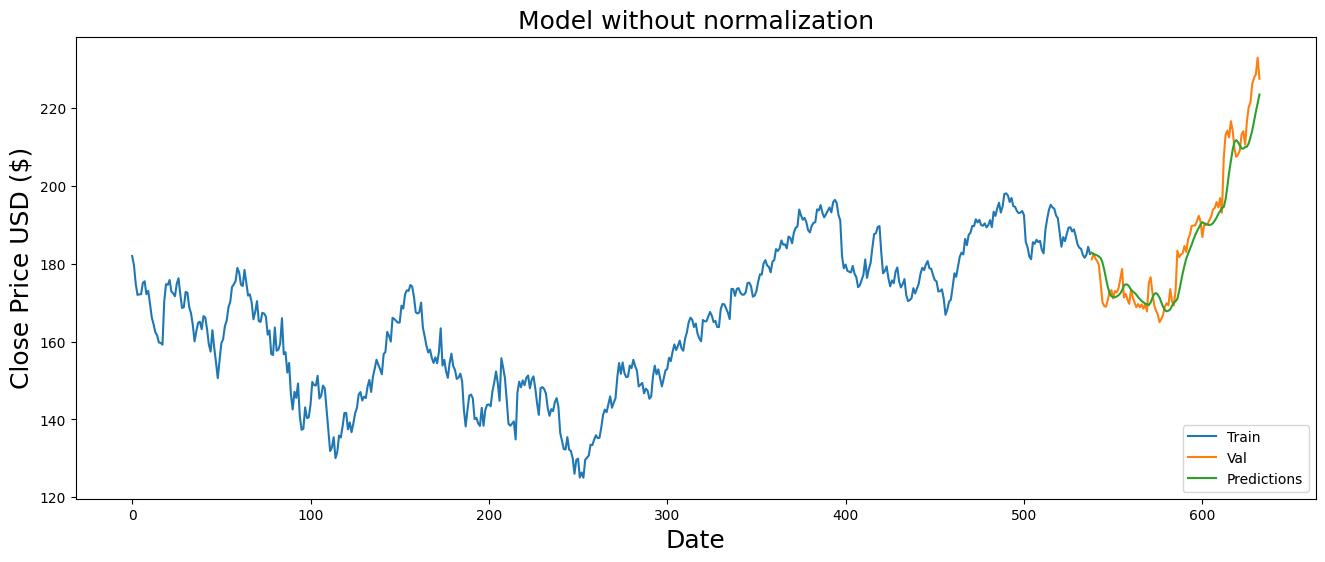

In [12]:
# Robust Scaler
scalerRobust = RobustScaler()
scaled_RobustScaler = scalerRobust.fit_transform(data.values)

x_train_Robust = []
y_train_Robust = []
x_test_Robust = []
modelRobust = Sequential()

visualizeTrain(scaled_RobustScaler, x_train_Robust,
               y_train_Robust, modelRobust)
Evaluation(scaled_RobustScaler, scalerRobust, xtest=x_test_Robust)

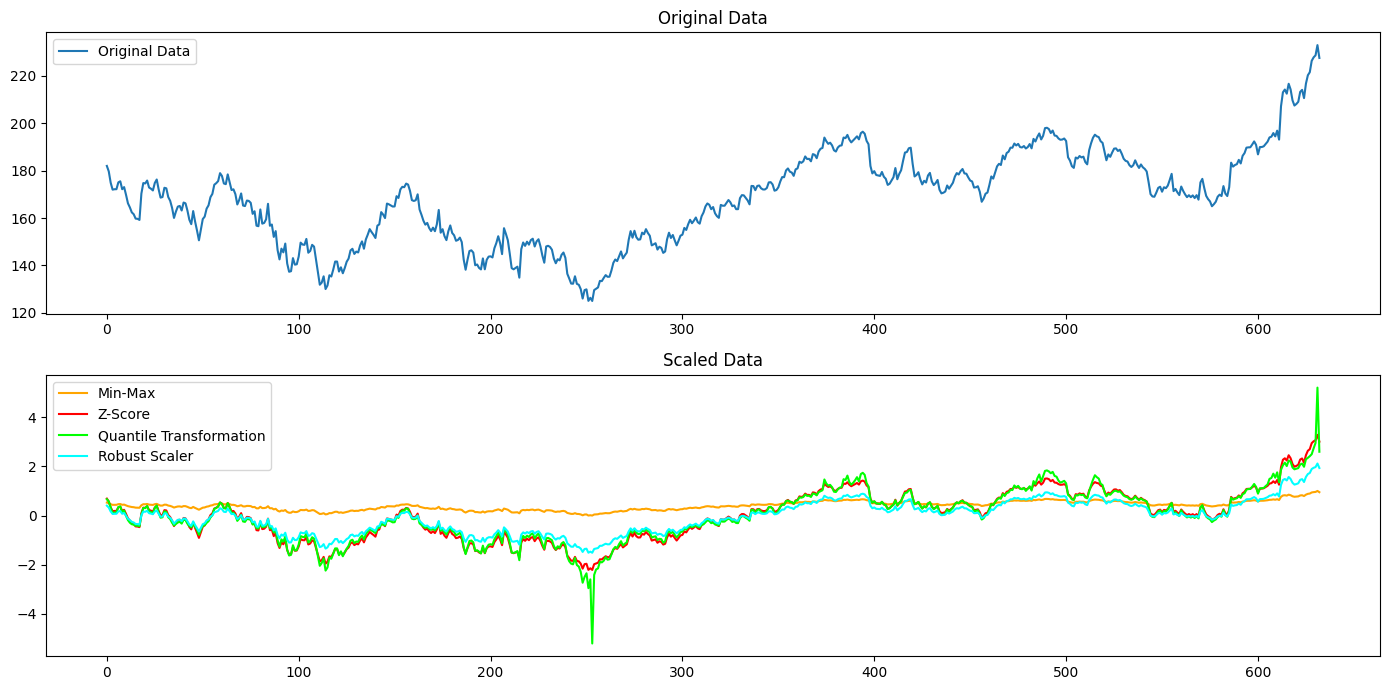

In [13]:
scaled_df = pd.DataFrame(scaled_data, columns=['Close'])
scaled_df2 = pd.DataFrame(scaled_Z_Score, columns=['Close'])
scaled_df3 = pd.DataFrame(scaled_quantile, columns=['Close'])
scaled_df4 = pd.DataFrame(scaled_RobustScaler, columns=['Close'])

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(scaled_df, label='Min-Max', color='orange')
plt.plot(scaled_df2, label='Z-Score', color='red')
plt.plot(scaled_df3, label='Quantile Transformation', color='lime')
plt.plot(scaled_df4, label='Robust Scaler', color='cyan')
plt.title('Scaled Data')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
l1_normalized = Normalizer(norm='l2')
scaled_L1 = l1_normalized.fit_transform(data.values)
#print(scaled_L1)
print("\nOriginal data:\n", data.head())
print("\nL1 Normalized data:\n", scaled_L1[:3])


Original data:
         Close
0  182.009995
1  179.699997
2  174.919998
3  172.000000
4  172.169998

L1 Normalized data:
 [[1.]
 [1.]
 [1.]]


In [ ]:
l1_normalized = Normalizer(norm='l2')
scaled_L1 = l1_normalized.fit_transform(data.values)
# print(scaled_L1)
print("\nOriginal data:\n", data.head())
print("\nL1 Normalized data:\n", scaled_L1[:3])